<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/Labs/coin_tosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pylab as plt


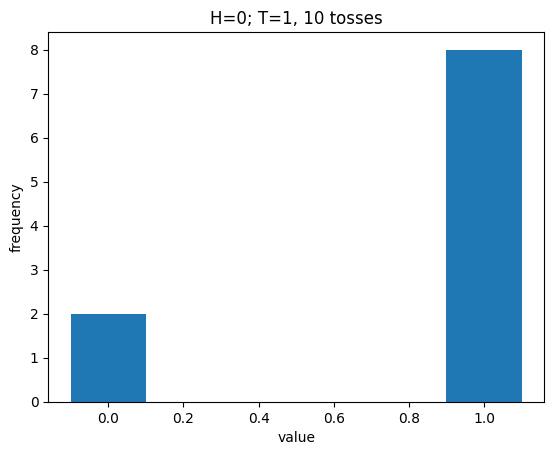

In [25]:
np.random.seed(617)
cointoss = []
N = 10
for i in range(N):
  cointoss.append(np.round(np.random.rand()))

plt.hist(cointoss, bins=[-0.1, 0.1, 0.9, 1.1]);
#cointoss
plt.xlabel("value")
plt.ylabel("frequency")
plt.title(f"H=0; T=1, {N} tosses");


P(H) = 0.5


P(HH) = 0.5 * 0.5 = 0.25

P(HHT) = 0.5 * 0.5 * 0.5 = 0.125

P(2H & 1T) = P(HHT) + P(HTH) + P(THH) = 3 * 0.125  = 0.375

$P(N_H; N_T) = P(H)^{N_H} * P(T)^{N_T} * {N_H + N_T \choose  N_H} $

In [26]:
from math import comb
P_2H_8T = 0.5**8 * 0.5**2 * comb(10,2)
print(f"the probability of 2H and 8T is {P_2H_8T}")

the probability of 2H and 8T is 0.0439453125


In [27]:
import scipy as sp

In [28]:
sp.stats.binom?

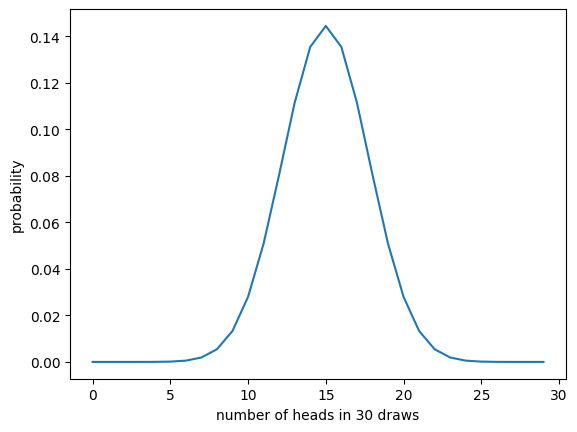

In [29]:
support = np.arange(0, 30)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# vegas coin
lets weight the coin toward tail (by 30%)

Text(0, 0.5, 'probability')

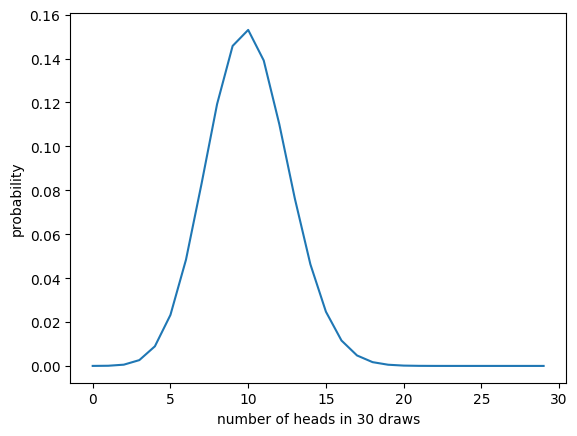

In [30]:
plt.plot(support, sp.stats.binom.pmf(support, 30, 1/3));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability")

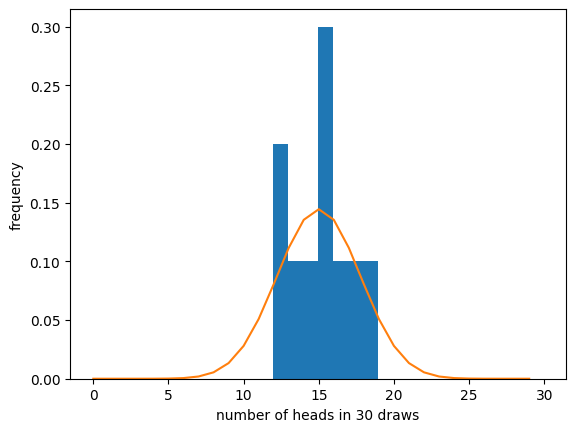

In [31]:
np.random.seed(302)
plt.hist(sp.stats.binom.rvs(30, 0.5, size=10), bins=np.arange(-0.05,30.05), density=True);
support = np.arange(0, 30)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

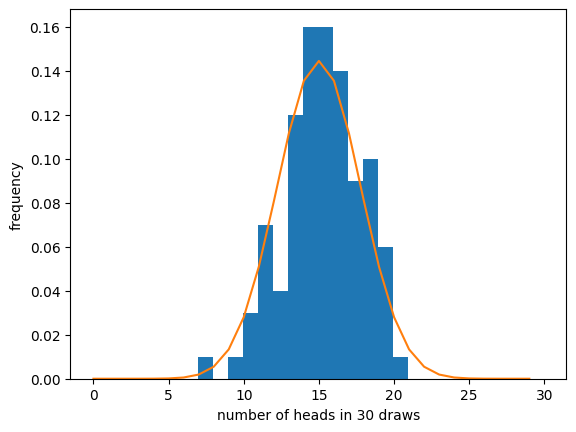

In [32]:
plt.hist(sp.stats.binom.rvs(30, 0.5, size=100), bins=np.arange(-0.05,30.05), density=True);
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

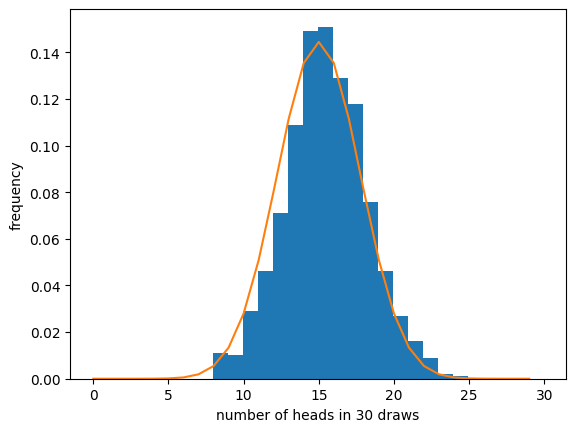

In [33]:
plt.hist(sp.stats.binom.rvs(30, 0.5, size=1_000), bins=np.arange(-0.05,30.05), density=True);
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

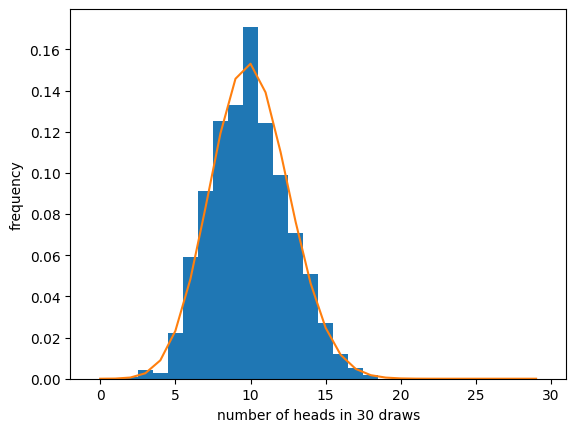

In [34]:
plt.hist(sp.stats.binom.rvs(30, 1/3, size=1000), bins=np.arange(-0.5,30), density=True);
plt.plot(support, sp.stats.binom.pmf(support, 30, 1/3));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

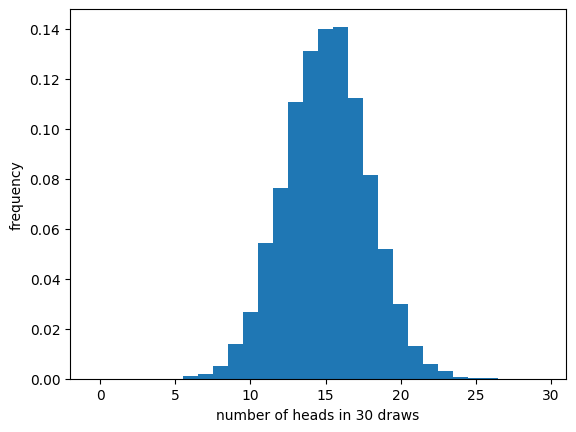

In [35]:
# we can also do it the hacky way if we dont know or want to use a package with a fundtion that is under the hood and we dont see
cointoss = np.zeros(10_000)
for i in range(10_000):
  cointoss[i] = np.round(np.random.rand(30)).sum()

plt.hist(cointoss, bins=np.arange(-0.5,30), density=True);
#cointoss
plt.ylabel("frequency")
plt.xlabel("number of heads in 30 draws");


1.0


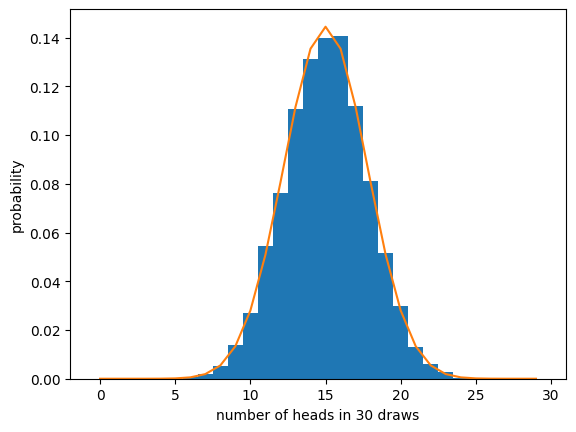

In [36]:
print(plt.hist(cointoss, bins=np.arange(-0.5,30), density=True)[0].sum())
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));

plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

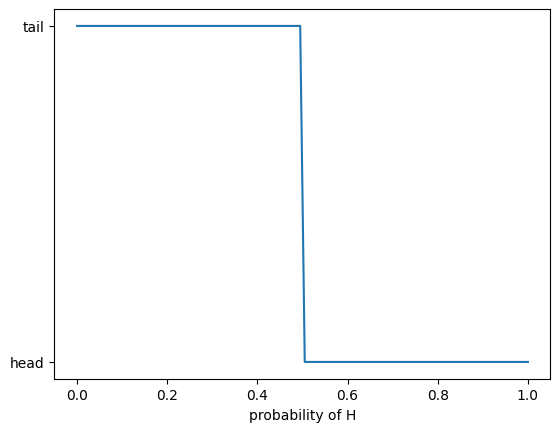

In [37]:
x = np.linspace(0.0, 1, 100)
prior = np.zeros_like(x)
prior[:50] = 1 #I believe this is an unfair coin weighted to get tail
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.yticks([0, 1], ["head", "tail"]);

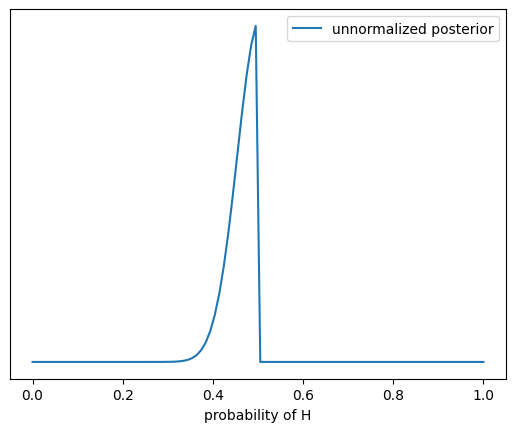

In [39]:
x = np.linspace(0.0, 1, 100)
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood * prior, label="unnormalized posterior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

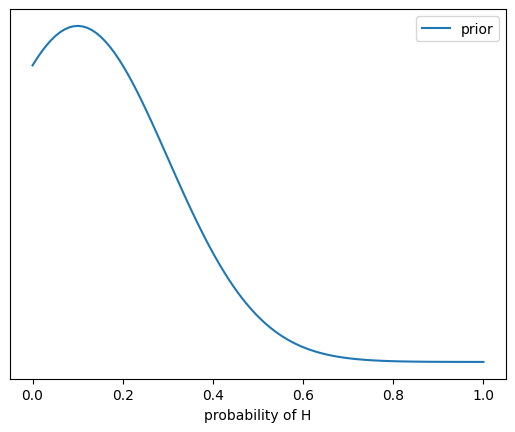

In [42]:
x = np.linspace(0.0, 1, 100)
prior = sp.stats.norm.pdf(x, 0.1, 0.2)
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);


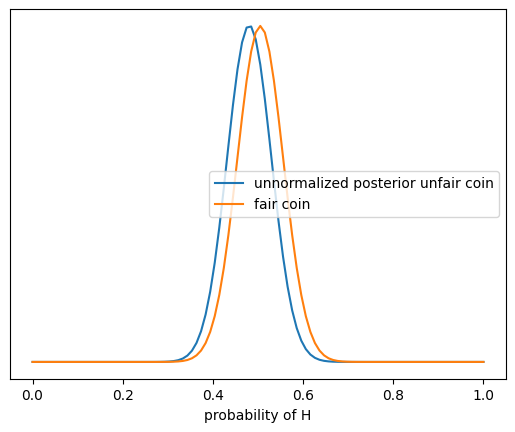

In [52]:
x = np.linspace(0.0, 1, 100)
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood * prior, label="unnormalized posterior unfair coin")
plt.plot(x, sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5) / 3.45, label="fair coin")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);